<h1 align=center><font size = 5>The city of coffee shops: Clustering Toronto neighborhoods by income</font></h1>

## Introduction

Hi! Welcome to this notebook! The idea is to provide an initial guidance to a potential business owner looking to open a location in one of Toronto's neighborhoods. This initial guidance gives insights on the possible types of businesses that are common in a community and how the income profile of a certain community might affect their preferences reflected on the venues present. Customer income level is one of the most important traits to take into account when opening a physical store as it also serves as an initial guidance to a price point for the business. This is why we decided to explore how these income levels affect the various venues throughout Toronto and combine all this data to provide meaningful insights.

Moreover, by clustering the different neighborhods based on their income level and their most popular venues we also get a profile of the current state for the neighborhoods of Toronto. This can also prove to be helpful since it shows a picture of what the competition currently looks like and the possible preferences of the population in those neighborhoods. All this should be taken into account when thinking about a new venture in a certain area.

## Data description

For our analysis we will be using information on the city of Toronto as well as information on the different venues classified by their neighborhood locations. 

For the information on Toronto neighborhoods as well as the income level for each neighborhood we will be using an open dataset produced by Statistics Canada for the 2016 census, although the income data dates from 2015. This data is free to use and is compiled by official Canadian governmental sources. For more information you can extract and check the data in the following link:

https://open.toronto.ca/dataset/neighbourhood-profiles/

We will also be using the Foursquare API to extract venue information such as latitude, longitude, category, etc. in order to perform our analysis. For more information on the Foursquare API, please visit the official developer website at Foursquare.

Thanks for reading this notebook! Please enjoy!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  Donwloading and formatting dataset

2.  Getting neighborhood coordinates and mapping

3.  Using Foursquare API to get venues

4.  Analyzing neighborhoods

5.  Clustering
    
6.  Analyzing clusters
    
7.  Conclusions
    
8.  Next steps
    </font>
    </div>

Installing all necessary libraries and dependencies

In [1]:
import numpy as np # library to handle data in a vectorized manner

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import pandas library
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -q -c conda-forge folium=0.5.0 --yes # install from conda
import folium # map rendering library
!conda install -q -c conda-forge geopy --yes # install from conda
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## 1. Donwloading and formatting dataset

The following dataset contains information on the 140 neighborhoods that comprise the city of Toronto, CA. It includes information on the names of the neighborhoods and other demographics such as median and total income, population, etc. For our purposes, the information we will use is the Total Income by neighborhood from 2015. For more information on the dataset please visit the source: https://open.toronto.ca/dataset/neighbourhood-profiles/

In [189]:
#Downloading data
!wget -q -O 'toronto-data.csv' https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv

In [2]:
#Transforming data from csv to dataframe
df = pd.read_csv('toronto-data.csv')
df = df[df['_id']==945]
df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
944,945,Income,Income of individuals in 2015,Census Profile 98-316-X2016001,Total - Income statistics in 2015 for the popu...,"2,294,785","25,005","20,400","10,265","26,295","23,410","13,270","23,945","18,730","11,150","18,560","5,250","24,610","18,345","16,965","6,280","12,360","7,745","9,880","14,350","10,195","8,420","9,590","11,195","29,085","21,740","13,660","13,255","12,175","7,950","14,060","22,760","20,130","31,825","29,220","10,430","17,290","13,070","18,075","7,645","17,085","15,895","9,770","17,535","10,615","9,260","24,430","11,915","8,360","13,210","18,980","19,810","10,935","14,800","8,660","10,255","12,585","12,065","11,300","37,410","12,010","9,430","14,325","16,150","17,740","7,590","6,280","37,385","13,645","11,280","12,270","13,360","13,660","8,725","35,865","8,370","9,115","22,380","29,830","14,275","17,025","10,865","25,740","13,780","26,550","9,670","13,950","20,820","28,390","9,740","16,075","10,750","17,840","15,400","7,740","12,495","28,900","8,975","6,490","13,760","9,270","9,040","8,720","18,740","12,565","18,000","38,125","8,020","7,825","13,080","18,595","23,140","15,040","21,120","20,830","23,140","12,535","17,615","8,395","15,250","14,490","6,170","14,550","61,985","22,395","27,850","22,640","14,605","9,425","23,330","44,340","14,935","18,585","43,410","10,110","6,685","11,345","9,995","11,170","23,530","12,065"


In [3]:
# Taking lines from Total income for each neighborhood and creating the new dataframe
toronto_neighs = df.columns[6:]
toronto_df = df[toronto_neighs].transpose()
toronto_df = toronto_df.reset_index()
toronto_df.rename(columns={'index':'Neighborhood',944:'Total income'}, inplace=True)

# Formatting dataframe columns to correct data types for manipulation
toronto_df['Total income'] = toronto_df['Total income'].apply(lambda x: x.replace(',','')).astype('int')
toronto_df['Neighborhood'][77] = 'Mimico' #Manually changing Mimico for formatting reasons
toronto_df['Neighborhood'] = toronto_df['Neighborhood'].apply(lambda x: x.split('-')[0]).astype(str)

toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  140 non-null    object
 1   Total income  140 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [4]:
toronto_df.head()

,Neighborhood,Total income
0,Agincourt North,25005
1,Agincourt South,20400
2,Alderwood,10265
3,Annex,26295
4,Banbury,23410


Since we are trying to cluster neighborhoods considering their relative wealth, we will be using the total income column as a percentage of median income in Toronto. Per the dataset we obtained, median total income for 2015 is $30,089. We will use this number for our calculations

In [5]:
#calculate percentage
income = toronto_df['Total income'] / 30089
toronto_income = toronto_df.drop('Total income',1)
toronto_income['Percent income'] = income
toronto_income = toronto_income.groupby('Neighborhood').mean().reset_index()
toronto_income.head()

,Neighborhood,Percent income
0,Agincourt North,0.831035
1,Agincourt South,0.677989
2,Alderwood,0.341155
3,Annex,0.873907
4,Banbury,0.778025


## 2. Getting neighborhood coordinates and mapping

Once we have downloaded the dataset with all the neighborhoods, we will proceed to get the coordinates for each neighborhood and map them.

In [6]:
# define a function to get coordinates using geocoder
def get_latlng(neighborhood):
    geolocator = Nominatim(user_agent="tr_explorer")
    g = geolocator.geocode('{}, Toronto, Canada'.format(neighborhood))
    if g:
        lat_lng_coords = [g.latitude, g.longitude]
    else:
        lat_lng_coords = []
    return lat_lng_coords

In [7]:
coords = [get_latlng(neighborhood) for neighborhood in toronto_df['Neighborhood'].tolist()]
coords[:6]

[[43.8080383, -79.2664391],
 [43.7853531, -79.2785494],
 [43.6017173, -79.5452325],
 [43.6703377, -79.407117],
 [43.7427961, -79.3699566407258],
 [43.6655189, -79.4119373]]

In [8]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
toronto_df['Latitude'] = df_coords['Latitude']
toronto_df['Longitude'] = df_coords['Longitude']

In [9]:
toronto_df.dropna(axis=0, inplace=True) #dropping columns with no latitude and longitude values

toronto_df.head()

,Neighborhood,Total income,Latitude,Longitude
0,Agincourt North,25005,43.808038,-79.266439
1,Agincourt South,20400,43.785353,-79.278549
2,Alderwood,10265,43.601717,-79.545232
3,Annex,26295,43.670338,-79.407117
4,Banbury,23410,43.742796,-79.369957


In [10]:
# get the coordinates for main city, Toronto, CA
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="tr-explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [11]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## 3. Using Foursquare API to get venues

Now we will use the Foursquare API in order to get venues for each of the neighborhoods. For more info on the Foursquare API please visit the developer site at Foursquare.

In [12]:
CLIENT_ID = 'J3ZTYCPKOVSOK3J1O3PKK1JKZOCDQL53FLC2TSJDUGZTL3K1' # Foursquare ID
CLIENT_SECRET = 'BDQ15J0FDTJ0DVBWXSP4LGGKPRBSURFWYPYSY1G4BBEREPCA' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [13]:
LIMIT = 100 # A default Foursquare API limit value

#defining function to get venues for each neighborhood point
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )
print(toronto_venues.shape)
toronto_venues.head()

(3090, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North,43.808038,-79.266439,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
1,Agincourt North,43.808038,-79.266439,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
2,Agincourt North,43.808038,-79.266439,Shoppers Drug Mart,43.808894,-79.269854,Pharmacy
3,Agincourt North,43.808038,-79.266439,Booster Juice,43.809915,-79.269382,Juice Bar
4,Agincourt North,43.808038,-79.266439,Dollarama,43.808894,-79.269854,Discount Store


In [15]:
# Checking for neighborhoods with less than 4 venues to exclude from analysis
venues_count = toronto_venues.groupby('Neighborhood').count().reset_index()
venues_count = venues_count[['Neighborhood','Venue']]
exclude_list = venues_count[venues_count['Venue'] < 4]
exclude_list.head()

,Neighborhood,Venue
8,Bayview Woods,1
9,Bedford Park,2
13,Blake,1
19,Centennial Scarborough,2
36,Eringate,2


In [16]:
toronto_filt = toronto_venues[~toronto_venues['Neighborhood'].isin(exclude_list['Neighborhood'])]
toronto_venues = toronto_filt
print(toronto_venues.groupby('Neighborhood').count().shape)
toronto_venues.groupby('Neighborhood').count().head()

(112, 6)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,27,27,27,27,27,27
Agincourt South,14,14,14,14,14,14
Alderwood,7,7,7,7,7,7
Annex,38,38,38,38,38,38
Banbury,4,4,4,4,4,4


## 4. Analyzing neighborhoods

In [32]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop('Neighborhood',axis=1,inplace=True)

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + toronto_onehot.columns.tolist()[:-1]
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped.head()

(112, 282)


,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Theater,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorsports Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vid

Sorting the venues and filtering the top 5 venues for each neighborhood

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(112, 6)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt North,Bank,Bakery,Liquor Store,Pizza Place,Sporting Goods Shop
1,Agincourt South,Chinese Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Coffee Shop,Asian Restaurant
2,Alderwood,Pizza Place,Pharmacy,Gym,Sandwich Place,Pub
3,Annex,Pizza Place,Bistro,Gym,Coffee Shop,Park
4,Banbury,Park,Tennis Court,Auto Garage,Electronics Store,Dog Run


## 5. Clustering

In [34]:
#join population data
toronto_grouped = toronto_grouped.join(toronto_income.set_index('Neighborhood'), on = 'Neighborhood')

#replace null values with 0
toronto_grouped['Percent income'].fillna(0, inplace=True)
print(toronto_grouped.shape)
toronto_grouped.head()

(112, 283)


,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Theater,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorsports Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vid

In [35]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(len(kmeans.labels_))

112


In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [74]:
toronto_merged = neighborhoods_venues_sorted

# merge data to get latitude and longitude in the same table
toronto_merged = toronto_merged.join(toronto_df.set_index('Neighborhood'), on='Neighborhood')

print(toronto_merged.shape)
toronto_merged.head()

(114, 10)


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Total income,Latitude,Longitude
0,2,Agincourt North,Bank,Bakery,Liquor Store,Pizza Place,Sporting Goods Shop,25005,43.808038,-79.266439
1,2,Agincourt South,Chinese Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Coffee Shop,Asian Restaurant,20400,43.785353,-79.278549
2,1,Alderwood,Pizza Place,Pharmacy,Gym,Sandwich Place,Pub,10265,43.601717,-79.545232
3,2,Annex,Pizza Place,Bistro,Gym,Coffee Shop,Park,26295,43.670338,-79.407117
4,3,Banbury,Park,Tennis Court,Auto Garage,Electronics Store,Dog Run,23410,43.742796,-79.369957


We finally have all the parts for the final dataframe we will use in our analysis for the last section. We have: information on the top most common venues, neighborhood name, latitude, longitude, cluster label and income data. However, we need to put all of this togetherin in one dataframe. That is what we will do now.

In [75]:
toronto_merged = toronto_merged.drop_duplicates(['Neighborhood']) # eliminating duplicate rows to exclude from clusters
toronto_merged = toronto_merged.drop(columns=['Total income'],axis=1)
toronto_merged = toronto_merged.join(toronto_income.set_index('Neighborhood'), on = 'Neighborhood')
print(toronto_merged.shape)
toronto_merged.head()

(112, 10)


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude,Percent income
0,2,Agincourt North,Bank,Bakery,Liquor Store,Pizza Place,Sporting Goods Shop,43.808038,-79.266439,0.831035
1,2,Agincourt South,Chinese Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Coffee Shop,Asian Restaurant,43.785353,-79.278549,0.677989
2,1,Alderwood,Pizza Place,Pharmacy,Gym,Sandwich Place,Pub,43.601717,-79.545232,0.341155
3,2,Annex,Pizza Place,Bistro,Gym,Coffee Shop,Park,43.670338,-79.407117,0.873907
4,3,Banbury,Park,Tennis Court,Auto Garage,Electronics Store,Dog Run,43.742796,-79.369957,0.778025


Creating a map to visualize clustered neighborhoods

In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. Analyzing clusters

In [77]:
import matplotlib.pyplot as plt

In [82]:
def total_venue_categories(df):
    df_all_venues = df['1st Most Common Venue']
    df_all_venues = df_all_venues.append(df['2nd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['3rd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['4th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['5th Most Common Venue'])
    df_cnt = df_all_venues.value_counts().to_frame().reset_index()
    df_cnt.columns = ['Venue Category', 'Venue Count']
    df_cnt.sort_values(by = 'Venue Count', ascending = False)
    return df_cnt.head(10)

Cluster 0: High income

In [87]:
toronto_cluster0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(2, toronto_merged.shape[1]))]]
print('Mean income for all neighborhoods in cluster is {}'.format(toronto_cluster0['Percent income'].mean()))
toronto_cluster0.head()

Mean income for all neighborhoods in cluster is 1.4423598878881538


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude,Percent income
44,Islington,Coffee Shop,Fast Food Restaurant,Sandwich Place,Pub,Bakery,43.645335,-79.524816,1.243312
50,L'Amoreaux,Chinese Restaurant,Shopping Mall,Bus Stop,Coffee Shop,Caribbean Restaurant,43.799003,-79.305967,1.242481
56,Malvern,Fast Food Restaurant,Pharmacy,Pizza Place,Grocery Store,Skating Rink,43.809196,-79.221701,1.191964
99,Waterfront Communities,Coffee Shop,Restaurant,Fast Food Restaurant,American Restaurant,Pub,43.772985,-79.499928,2.060055
103,Willowdale East,Coffee Shop,Japanese Restaurant,Grocery Store,Sandwich Place,Gym,43.761510,-79.410923,1.473628


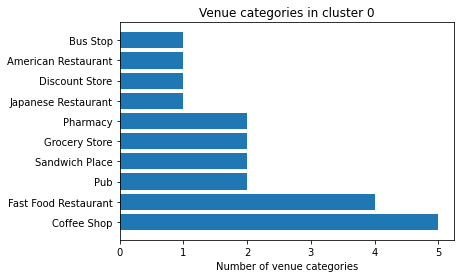

In [80]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 0])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center')
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 0')
 
plt.show()

Cluster 1: Low income

In [88]:
toronto_cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(2, toronto_merged.shape[1]))]]
print('Mean income for all neighborhoods in cluster is {}'.format(toronto_cluster1['Percent income'].mean()))
toronto_cluster1.head()

Mean income for all neighborhoods in cluster is 0.39317035261145356


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude,Percent income
2,Alderwood,Pizza Place,Pharmacy,Gym,Sandwich Place,Pub,43.601717,-79.545232,0.341155
5,Bathurst Manor,Korean Restaurant,Grocery Store,Coffee Shop,Eastern European Restaurant,Bar,43.665519,-79.411937,0.441025
8,Beechborough,Furniture / Home Store,Discount Store,Video Store,Auto Garage,Dessert Shop,43.695030,-79.471683,0.174482
10,Black Creek,Construction & Landscaping,Playground,Fast Food Restaurant,Coffee Shop,Electronics Store,43.695400,-79.485495,0.563827
11,Broadview North,Coffee Shop,Grocery Store,Discount Store,Park,Ice Cream Shop,43.683924,-79.356964,0.328359


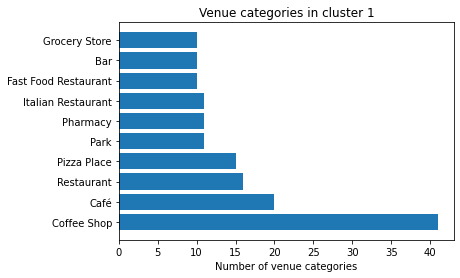

In [90]:
#count venue categories in all neighborhoods in the cluster
t1 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 1])

y_pos = np.arange(len(t1['Venue Category']))
plt.barh(y_pos, t1['Venue Count'], align='center')
plt.yticks(y_pos, t1['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 1')
 
plt.show()

Cluster 2: High-medium income

In [92]:
toronto_cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(2, toronto_merged.shape[1]))]]
print('Mean income for all neighborhoods in cluster is {}'.format(toronto_cluster2['Percent income'].mean()))
toronto_cluster2.head()

Mean income for all neighborhoods in cluster is 0.8000709007721537


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude,Percent income
0,Agincourt North,Bank,Bakery,Liquor Store,Pizza Place,Sporting Goods Shop,43.808038,-79.266439,0.831035
1,Agincourt South,Chinese Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Coffee Shop,Asian Restaurant,43.785353,-79.278549,0.677989
3,Annex,Pizza Place,Bistro,Gym,Coffee Shop,Park,43.670338,-79.407117,0.873907
6,Bay Street Corridor,Italian Restaurant,Boutique,Spa,Café,French Restaurant,43.672798,-79.390734,0.795806
7,Bayview Village,Bank,Fish Market,Pizza Place,Outdoor Supply Store,Sandwich Place,43.769197,-79.376662,0.622487


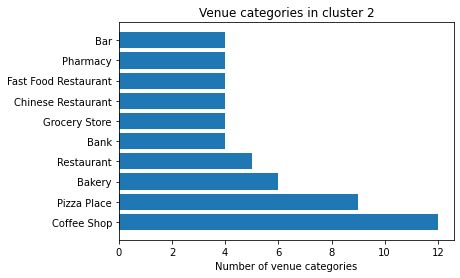

In [93]:
#count venue categories in all neighborhoods in the cluster
t2 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 2])

y_pos = np.arange(len(t2['Venue Category']))
plt.barh(y_pos, t2['Venue Count'], align='center')
plt.yticks(y_pos, t2['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 2')
 
plt.show()

Cluster 3: Low-medium income

In [95]:
toronto_cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(2, toronto_merged.shape[1]))]]
print('Mean income for all neighborhoods in cluster is {}'.format(toronto_cluster3['Percent income'].mean()))
toronto_cluster3.head()

Mean income for all neighborhoods in cluster is 0.6310445677822459


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude,Percent income
4,Banbury,Park,Tennis Court,Auto Garage,Electronics Store,Dog Run,43.742796,-79.369957,0.778025
28,Edenbridge,Park,Carpet Store,Plaza,Coffee Shop,Farmers Market,43.682338,-79.510804,0.434378
31,Englemount,Metro Station,Park,Coffee Shop,Bus Stop,Yoga Studio,43.717222,-79.438291,0.567815
39,High Park North,Park,Mattress Store,Baseball Field,Gym / Fitness Center,Tennis Court,43.657383,-79.470961,0.630795
83,Rockcliffe,Soccer Field,Park,Tennis Court,Construction & Landscaping,Fish & Chips Shop,43.681477,-79.491307,0.622819


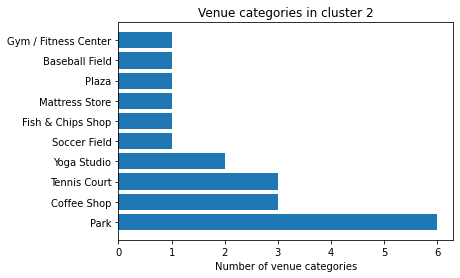

In [96]:
#count venue categories in all neighborhoods in the cluster
t3 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 3])

y_pos = np.arange(len(t3['Venue Category']))
plt.barh(y_pos, t3['Venue Count'], align='center')
plt.yticks(y_pos, t3['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 2')
 
plt.show()

Summary Table by Cluster and Neighborhood

In [119]:
toronto_sum = toronto_merged.groupby(['Cluster Labels','Neighborhood']).mean()
toronto_sum.drop(columns=['Latitude', 'Longitude'], axis=1, inplace=True)
toronto_sum

Percent income
Cluster Labels Neighborhood                           
0              Islington                      1.243312
               L'Amoreaux                     1.242481
               Malvern                        1.191964
               Waterfront Communities         2.060055
               Willowdale East                1.473628
               Woburn                         1.442720
1              Alderwood                      0.341155
               Bathurst Manor                 0.441025
               Beechborough                   0.174482
               Black Creek                    0.563827
               Broadview North                0.328359
               Brookhaven                     0.476918
               Cabbagetown                    0.338828
               Caledonia                      0.279836
               Casa Loma                      0.318721
               Cliffcrest                     0.440526
               Corso Italia                   0.404633
               Danforth                       0.264216
               Danforth East York             0.467280
               Dufferin Grove                 0.346638
               East End                       0.574629
               Eglinton East                  0.600718
               Elms                           0.254080
               Etobicoke West Mall            0.324703
               Flemingdon Park                0.582771
               Greenwood                      0.395992
               Guildwood                      0.277842
               Henry Farm                     0.439031
               Hillcrest Village              0.491874
               Humber Heights                 0.287813
               Humber Summit                  0.340822
               Humewood                       0.400977
               Junction Area                  0.399149
               Keelesdale                     0.313404
               Kennedy Park                   0.476088
               Kensington                     0.536741
               Kingsway South                 0.252252
               Lawrence Park North            0.374888
               Lawrence Park South            0.407790
               Leaside                        0.444016
               Little Portugal                0.453987
               Long Branch                    0.289973
               Markland Wood                  0.302935
               Morningside                    0.474426
               Moss Park                      0.565821
               Mount Dennis                   0.361095
               Mount Pleasant East            0.457975
               New Toronto                    0.321380
               Newtonbrook East               0.463625
               North Riverdale                0.323706
               North St. James Town           0.534248
               O'Connor                       0.511815
               Oakridge                       0.357273
               Oakwood Village                0.592908
               Old East York                  0.257237
               Palmerston                     0.415268
               Playter Estates                0.215693
               Pleasant View                  0.457310
               Princess                       0.308086
               Regent Park                    0.300442
               Rexdale                        0.289807
               Roncesvalles                   0.417594
               Runnymede                      0.266543
               Rustic                         0.260062
               Scarborough Village            0.434710
               St.Andrew                      0.499850
               Taylor                         0.416597
               The Beaches                    0.585430
               Thistletown                    0.279006
               Thorncliffe Park               0.506830
               Trinity                        0.481571
               University

## 7. Conclusions

From our analysis above we can see that classifying the different neighborhoods in the city of Toronto by their income yields interesting results. First, it looks like Toronto is the city of coffee shops! Coffee shops was one of the most popular categories accross all income segments. However, besides that there seems to be a lot of differences between the clusters in terms of popular venues.

For Cluster 0, which aggregates the neighborhoods with the highest income relative to the median income in 2015, it looks like there's a tendency to quick eating venues such as fast food restaurants or sandwich places. The reason behind this might be that the neighborhoods included here tend to have a strong commercial sector. All these quick eats places might be there as part of the shopping experience. This can be a good guide for a new business trying to open in this areas to maybe stay away from sit-down experiences in favor of something more for-the-go.

For Cluster 1, the low income cluster, it seems there's the opposite tendency as there're more full-service restaurants. This might be explained as these might also be more residential areas which, in turn, house more families. An interesting next step here would be to research the average price level for these restaurant venues (in case the interest is in restaurant in particular) to get a sense of the level of prices that the population here is used to. Nevertheless, a price level research can also result in a good idea of the price elasticity for this population. Again, the main takeaway here are the most popular categories that resulted from the analysis.

For Cluster 2, the high medium income cluster, it seems the tendency more closely resembles that of a residential-familiar neighborhood with the inclusion of bakeries and grocery stores and even banks in the mix. Given that these areas command a higher income than Cluster 1, for example, it would make sense that price levels might also be higher for entertaiment venues such as restaurants. This might also be explained by the age level in these neighborhoods, as if there's an older skew, that might explain the tendency to a more daylight entertaiment.

Finally Cluster 3, the low medium income cluster, presents some interesting characteristic with the high prevalence of parks and places for exercising and sports in contrast to dining for the other clusters. A good idea here would be to think about complementary services that go hand in hand with these venues instead of thinking about the same venues already present here.

## 8. Next steps

To end this work, I would like to finish the way that every business action finishes, not only with an answer but with next steps in light of the insights we have gathered. First off, further work is needed with more data and with better quality datasets in order to determine the best locations for certain businesses. As said in the conclusion paragraph above, data such as age, marital status, labor status, etc. might be useful to determine the probability of success for a specific venture. Additionally, there should also be field research to get to the appropriate price level and to empiricallly confirm the insights drawed from this analysis.

Finally, in determining the success of a business venture a data analysis is never enough to make a full prediction. Even though this analysis might give a business owner the first major insight to take that first step he or she requires, there still is work to be done!

### Thank you for reading this report!

This notebook was created by Marcelo Ocampo for the Coursera Data Science with Capstone course.